<a href="https://colab.research.google.com/github/SheikhIrtiza/Alexa/blob/main/Demo_of_Cluster_Based_Incentivization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lithion power is the largest producer of electric vehicle(e-vehicle) batteries.

They provide batteries on rent to e-vehicle drivers. Drivers rent a battery typically for a day and thereafter replacing it with a charged battery from the company.

Lithion power has a variable pricing model based on the driver's driving history. Battery life depends on factors such as over speeding, distance driven per day, etc.

Now we are supposed to create a cluster model where drivers can be grouped together based on the driving data and group the datapoints so that drivers will be incentivized based on the cluster.

In [39]:
import pandas as pd
import numpy as np
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
#warnings for programmers about changes in language or library features in anticipation of backwards incompatible changes coming with python 3.0
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,6)#rcPrams are used for handling default met plot lib values

In [40]:
df = pd.read_csv('/content/driver-data.csv')#read data
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [41]:
df.info()#no. of columns and entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [42]:
df.describe()#to check mean, count, std, min and max value

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [43]:
import sklearn
sklearn.__version__


'1.2.1'

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++')

In [45]:
Kmeans = KMeans(n_clusters=2)#2 is the min. no of clusters that can exist in a dataset
df_analyse = df.drop('id',axis=1)

In [46]:
Kmeans.fit(df_analyse)#fit the model to the data

KMeans(n_clusters=2)

In [47]:
Kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [48]:
print(Kmeans.labels_)#used for displaying labels
print(len(Kmeans.labels_))#length of those labels

[0 0 0 ... 1 1 1]
4000


In [49]:
print(type(Kmeans.labels_))
unique,counts = np.unique(Kmeans.labels_,return_counts=True)#to check how many unique drivers are there in the first  and second cluster
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


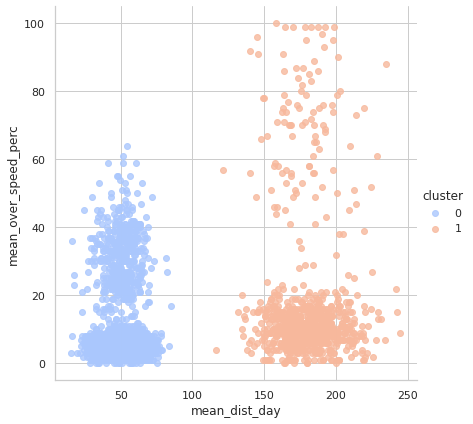

In [50]:
df_analyse["cluster"] = Kmeans.labels_
sns.set_style('whitegrid')#we are setting theme as whitegrid as it is better suited plots with heavy data elements
#plot the clusters using the LM plot fxn from the seaborn library
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyse
           ,hue='cluster',palette='coolwarm',size=6,aspect=1, fit_reg=False)

Here we can see that there are 2 clusters 
1. Centred around 50 mean distance delay and the 

2. around 175

Also we can see that there are more drivers in the cluster with the delay centred at 175, since K means

In [54]:
Kmeans_4 = KMeans(n_clusters=4)#Kmeans clusters gives optimum results when iterated multiple times
Kmeans_4.fit(df.drop('id',axis=1))
Kmeans_4.fit(df.drop('id',axis=1))
print(Kmeans_4.cluster_centers_)
unique,counts = np.unique(Kmeans_4.labels_,return_counts=True)

Kmeans_4.n_clusters
print(dict(zip(unique,counts)))#Zip unique clusters and their freq. counts within a dictionary

[[ 49.98428468   5.21441441]
 [180.34311782  10.52011494]
 [ 50.46127059  32.42823529]
 [177.83509615  70.28846154]]
{0: 2775, 1: 696, 2: 425, 3: 104}


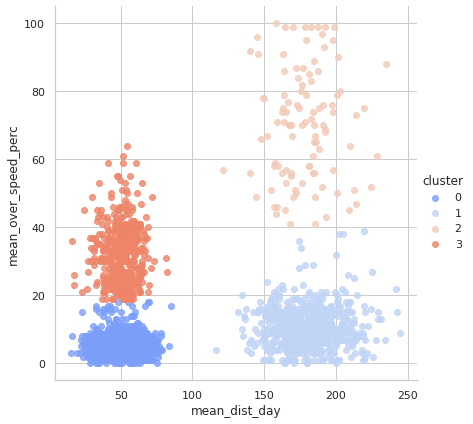

In [52]:
df_analyse['cluster']=Kmeans_4.labels_#now again applying the same for checking the difference 
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyse
           ,hue='cluster',palette='coolwarm',size=6,aspect=1, fit_reg=False)

It's denser compared to the two cluster plot and hence more optimal

**What we done in this demo**

1.Import libraries and the dataset

2.Fit the K-means model on the dataset

3.Evaluate cluster centers and labels

4.Plot the cluster to see the distribution of datapoints

5.Iterate the same  by changing the no. of clusters to 4

5.Again, evaluate the clusters to see the distribution of datapoints

6.Plot the clusters to see the distribution of datapoints

7.Draw inference out of the plots